In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Telco-Customer-Churn.xlsx')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1) Compare Churn Count with respect to gender

Values in each gender 
 Male      3555
Female    3488
Name: gender, dtype: int64


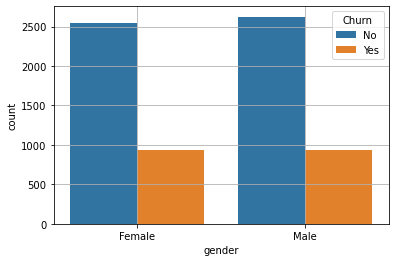

In [3]:
print("Values in each gender \n",data['gender'].value_counts())
sns.countplot(data=data,x='gender',hue='Churn') # Churn rate gender wise
plt.grid()

# 2) Find out how many female senior citizens there in the dataset

In [4]:
senior_female = data.groupby(['gender', 'SeniorCitizen']).size().reset_index().pivot(columns='gender', index='SeniorCitizen', values=0)
senior_female

gender,Female,Male
SeniorCitizen,,
0,2920,2981
1,568,574


# 3)Compare Tenure with Total Charges

In [36]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [39]:
data['TotalCharges']=pd.to_numeric(data.TotalCharges,errors='coerce')


In [40]:
data['TotalCharges'].dtypes

dtype('float64')

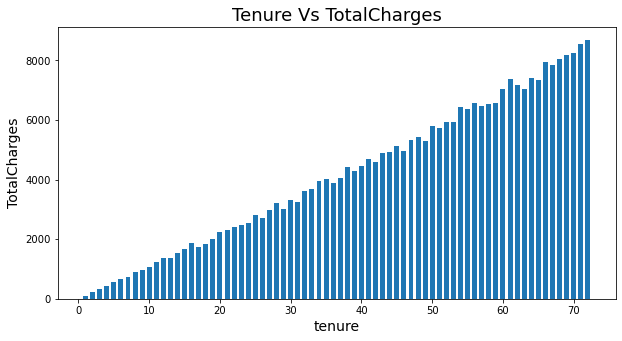

In [57]:
plt.figure(figsize=(10,5))
plt.bar(data['tenure'], data['TotalCharges'],width=0.7)
plt.title('Tenure Vs TotalCharges',fontsize=18)
plt.xlabel('tenure',fontsize=14)
plt.ylabel('TotalCharges',fontsize=14)
plt.show()

# 4) Find out which contract prefered by the senior citizen

Contract
 Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

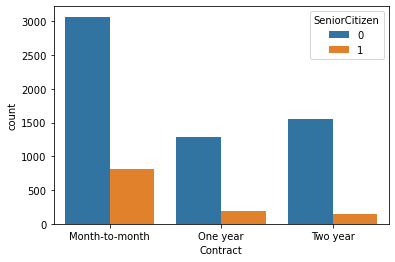

In [61]:
senior_contract = data.groupby(['Contract', 'SeniorCitizen']).size().reset_index().pivot(columns='Contract', index='SeniorCitizen', values=0)
senior_contract
data['Contract'].unique()
# Value Count and visualization
print("Contract\n",data["Contract"].value_counts())
# Contract Wise Churn Rate
sns.countplot(data=data,x="Contract",hue="SeniorCitizen")


# 5)Comment your finds on Payment Method

In [63]:
data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Payment method in each gender 
 Male      3555
Female    3488
Name: gender, dtype: int64


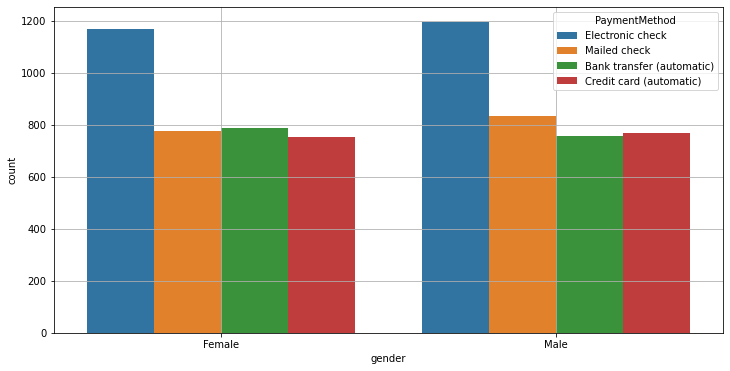

In [66]:
print("Payment method in each gender \n",data['gender'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='gender',hue='PaymentMethod') 
plt.grid()

In [70]:
# Majority choose Electronic check as the method of payment
#The genderwise analysis also shows that Electronic check is the popular method among both male and female population as well
#Female members however opts for bank transfer in the 2nd place whereas male population opts for mailed check method in the 2nd place